In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
bonds = pd.read_csv ('../../dataset/Indicators/bonds.csv', encoding='unicode_escape')

In [23]:
bonds.head()

,time,close
0,1976-06-01T02:00:00+02:00,0.68
1,1976-06-02T02:00:00+02:00,0.71
2,1976-06-03T02:00:00+02:00,0.70
3,1976-06-04T02:00:00+02:00,0.77
4,1976-06-07T02:00:00+02:00,0.79


In [24]:
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '1976-06-01') & (df.index <= '2022-11-02')]
    return df


In [25]:
bonds = cleaned_indicator(bonds)

In [26]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [27]:
def bonds_visualization(): 
    plt.plot(bonds, color= 'b')
    plt.title('US 10 Year bonds minus 2 Year bonds Spread', fontsize= 20)
    plt.axhline(y=0, color= 'red', label= 'Below 0 - Negative Spread')
    plt.legend(fontsize = 13, loc = 'lower right')
    plt.xlabel('Date', fontsize= 15)
    plt.ylabel('US 10Y - 2Y Spread', fontsize= 15)
    plt.style.use('seaborn')
    return plt.show()

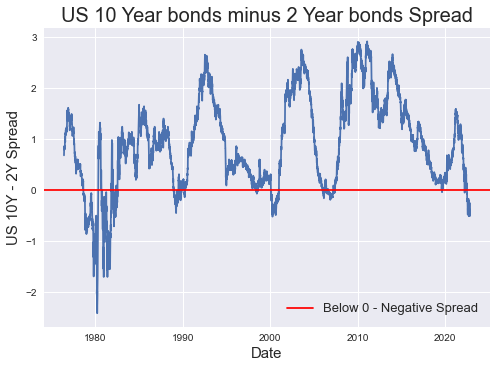

In [29]:
bonds_visualization()